In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR="E:/Images"
CATEGORIES=["mask","nomask"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        break
    break

In [2]:
img_array.shape
print(img_array)
training_data=[]


def create_training_data():
    for category in CATEGORIES:
        
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        
        for img in os.listdir(path):
    
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(70,70),interpolation=cv2.INTER_AREA)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

[[159 163 170 ... 152 104  84]
 [159 164 170 ... 132 144 117]
 [159 165 171 ... 113 119 120]
 ...
 [ 70  71  77 ...  38  35  33]
 [ 77  71  58 ...  35  33  31]
 [ 76  72  74 ...  35  33  33]]


(6785, 2)
2
[[array([[167, 182, 193, ...,  81, 114, 122],
       [167, 180, 187, ...,  58,  76,  96],
       [158, 165, 167, ...,  45,  50,  60],
       ...,
       [ 51,  54,  56, ...,  29,  30,  32],
       [ 59,  61,  54, ...,  30,  32,  36],
       [ 69,  61,  40, ...,  29,  36,  36]], dtype=uint8)
  0]
 [array([[ 14,  13,  14, ...,  32,  40,  42],
       [ 10,  13,  14, ...,  41,  46,  43],
       [ 11,  16,  19, ...,  40,  44,  40],
       ...,
       [168, 168, 167, ...,  78,  76,  78],
       [166, 168, 167, ...,  80,  75,  82],
       [164, 167, 166, ...,  82,  76,  85]], dtype=uint8)
  0]
 [array([[ 35,  26,  19, ...,  65, 116, 159],
       [ 33,  22,  22, ...,  61, 108, 156],
       [ 34,  24,  31, ...,  55,  83, 144],
       ...,
       [234, 234, 235, ..., 148, 148, 148],
       [234, 234, 234, ..., 150, 148, 148],
       [233, 233, 234, ..., 149, 148, 148]], dtype=uint8)
  0]
 ...
 [array([[15, 15, 14, ..., 14, 15, 14],
       [13, 15, 17, ..., 10, 15, 17],
       [12, 16

<function matplotlib.pyplot.show(*args, **kw)>

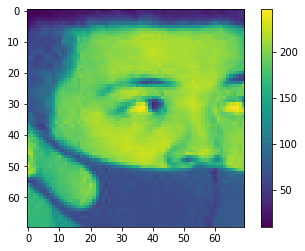

In [3]:
train_data=np.array(training_data)

print(train_data.shape)

print(train_data.ndim)
print(train_data)
print(train_data[1][0])
plt.figure()
plt.imshow(train_data[1][0])
plt.colorbar()
plt.grid(False)
plt.show

In [4]:
import random
random.shuffle(train_data)
X_train=[]
y_train=[]
X_test=[]
y_test=[]

for features,label in train_data[:int(0.9*len(training_data))]:
    X_train.append(features)
    y_train.append(label)
    
for features,label in train_data[int(0.9*len(training_data)):]:
    X_test.append(features)
    y_test.append(label)
    
X_train=np.array(X_train)
X_test=np.array(X_test)

In [5]:
print(X_train.shape)
print(X_train.ndim)
print(y_test)
X_train=X_train.reshape((-1,70,70,1))
X_train=X_train.astype('float32')/255

X_test=X_test.reshape((-1,70,70,1))
X_test=X_test.astype('float32')/255
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

(6106, 70, 70)
3
[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1

Using TensorFlow backend.


In [6]:
from tensorflow import keras
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(70,70,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='softmax'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(2,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(X_train,y_train,epochs=20,batch_size=64)
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)

Epoch 1/20
6106/6106 [==============================] - 51s 8ms/step - loss: 0.0438 - accuracy: 0.9852
Epoch 2/20
6106/6106 [==============================] - 53s 9ms/step - loss: 0.0428 - accuracy: 0.9859
Epoch 3/20
6106/6106 [==============================] - 53s 9ms/step - loss: 0.0328 - accuracy: 0.9903
Epoch 4/20
6106/6106 [==============================] - 53s 9ms/step - loss: 0.0266 - accuracy: 0.9906
Epoch 5/20
6106/6106 [==============================] - 53s 9ms/step - loss: 0.0259 - accuracy: 0.9929
Epoch 6/20
6106/6106 [==============================] - 53s 9ms/step - loss: 0.0201 - accuracy: 0.9934
Epoch 7/20
6106/6106 [==============================] - 55s 9ms/step - loss: 0.0218 - accuracy: 0.9930
Epoch 8/20
6106/6106 [==============================] - 56s 9ms/step - loss: 0.0154 - accuracy: 0.9956
Epoch 9/20
6106/6106 [==============================] - 53s 9ms/step - loss: 0.0179 - accuracy: 0.9943
Epoch 10/20
6106/6106 [==============================] - 53s 9ms/step - l

In [35]:
cameracapture=cv2.VideoCapture(0) ## here we are creating the input class by cv2.VideoCapture(0) 0 specifies which camera we are using..
fps=30 ## fps is assumed over here.. that is the conventional fps..
success, frame = cameracapture.read()
nfs=10*fps-1
counter=1
list=[]
cascade=cv2.CascadeClassifier("C:\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml")

In [36]:
while   success and cv2.waitKey(1)==-1 and nfs>0:
    success, frame = cameracapture.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        frame=cv2.rectangle(frame,(x,y-10),(x+w-3,y+h+10),(0,0,255),4)
        cv2.imwrite("D:\\tests\\img"+str(counter)+".jpg",frame)
        gray=gray[y-10:y+h+10,x:x+w-3]
    gray=cv2.resize(gray,(70,70),interpolation=cv2.INTER_AREA)
    gray=gray.reshape((-1,70,70,1))
    gray=gray.astype('float32')/255
    a=np.argmax(model.predict(gray))
    if a==0:
        list.append("mask on")
    else:
        list.append("mask off")
    counter=counter+1
    nfs=nfs-1
cameracapture.release()
for i,j in enumerate(list):
    print(str(i)+" "+j)

0 mask off
1 mask off
2 mask off
3 mask off
4 mask off
5 mask off
6 mask off
7 mask off
8 mask off
9 mask off
10 mask on
11 mask off
12 mask off
13 mask off
14 mask off
15 mask off
16 mask off
17 mask off
18 mask off
19 mask off
20 mask off
21 mask off
22 mask off
23 mask off
24 mask off
25 mask off
26 mask off
27 mask off
28 mask off
29 mask off
30 mask off
31 mask off
32 mask off
33 mask off
34 mask off
35 mask off
36 mask off
37 mask off
38 mask off
39 mask off
40 mask off
41 mask off
42 mask off
43 mask off
44 mask off
45 mask off
46 mask off
47 mask off
48 mask off
49 mask off
50 mask off
51 mask off
52 mask off
53 mask off
54 mask off
55 mask off
56 mask off
57 mask off
58 mask off
59 mask off
60 mask off
61 mask off
62 mask off
63 mask off
64 mask off
65 mask off
66 mask off
67 mask off
68 mask off
69 mask off
70 mask off
71 mask off
72 mask off
73 mask off
74 mask off
75 mask off
76 mask off
77 mask off
78 mask off
79 mask off
80 mask off
81 mask off
82 mask off
83 mask off
84 

In [10]:

cameracapture.release()